# Part I - PROSPER LOAN DATA EXPLORATION
## by KHALIFA MUYIDEEN

## Introduction
This data set belongs to a credit facilitating company called Prosper and it contains loan and information regarding each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


<h2> GATHERING DATA </h2>

In [2]:
#import CSV
df_loan = pd.read_csv('prosperLoanData.csv')

<h2> ASSESSING DATA </h2>

In [3]:
#View loan data
df_loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [4]:
#Check the df_archive information
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#check for unique values values
(df_loan.Occupation.nunique())

67

In [6]:
# see number of duplicated data entries
sum(df_loan.duplicated()) 

0

In [7]:
# see number of null values on each columns
df_loan.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [8]:
# Make copies of the original dataframe
loan_data = df_loan.copy()
loan_data.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [9]:
# Reemove columns with null value greater than 50%
for i in loan_data.columns:
    if (loan_data[i].isna().sum()/len(loan_data))*100 > 50:
        loan_data.drop(i,axis=1,inplace=True)
    else:
        pass

In [10]:
#View available columns
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'Term',
       'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
      

In [11]:
#View new loan data
loan_data

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,36,Current,0.22354,0.1864,0.1764,0.16490,0.0699,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,36,FinalPaymentInProgress,0.13220,0.1110,0.1010,0.10070,0.0200,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,60,Current,0.23984,0.2150,0.2050,0.18828,0.1025,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,60,Completed,0.28408,0.2605,0.2505,0.24450,0.0850,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [12]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 69 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   BorrowerAPR                         113912 non-null  float64
 6   BorrowerRate                        113937 non-null  float64
 7   LenderYield                         113937 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null   float64
 9   EstimatedLoss                       84853 non-null   float64
 10  EstimatedReturn                     84853 non-null   float64
 11  ProsperRating (numeric)   

In [13]:
#Convert ListingCategory to a category from numeric listing
listingcat = {0 : "Not Available", 1 : "Debt Consolidation", 2 : "Home Improvement", 3 : "Business", 4 : "Personal Loan", 5 : "Student Use",
 6 : "Auto", 7: "Other", 8 : "Baby&Adoption", 9 : "Boat", 10 : "Cosmetic Procedure",11 : "Engagement Ring", 12 : "Green Loans",
 13 : "Household Expenses",  14 : "Large Purchases", 15 : "Medical/Dental", 16 : "Motorcycle", 17 : "RV",
 18 : "Taxes", 19 : "Vacation", 20 : "Wedding Loans"}

In [14]:
#function to work on listing category
def listcat(x):
    return listingcat[x]


loan_data["ListingCategory"] = loan_data["ListingCategory (numeric)"].apply(listcat)

In [15]:
loan_data.drop(loan_data[loan_data['ProsperRating (numeric)'].isna()].index,inplace=True)
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          84853 non-null  object 
 1   ListingNumber                       84853 non-null  int64  
 2   ListingCreationDate                 84853 non-null  object 
 3   Term                                84853 non-null  int64  
 4   LoanStatus                          84853 non-null  object 
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             8485

In [16]:
loan_data.shape

(84853, 70)

### What is the structure of your dataset?

> The loan record has 113937 entries with 81 variables. The loan record however has been cleaned to have 84853 entries with 70 variables of which 3 are boolean, 41 floats, 11 integers and 15 objects.

### What is/are the main feature(s) of interest in your dataset?

> My interest is to understand how these variables translate to the amount of money borrowed 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> A lot of features will play 

## Univariate Exploration


### Methods

In [17]:
def hist_plot(col,binsize,data):
    
    bins = np.arange(0, data[col].max()+binsize, binsize)
    plt.figure(figsize=[10,6])
    plt.hist(data = data, x = col, bins = bins)
    plt.xlabel(col)
    plt.ylabel("count")
    plt.title(f"{col} distribution")
    plt.show()

In [18]:
def bar_plot(col, kind):
    plt.figure(figsize=[15,8])
    plt.subplot(1, 2, 1)
    loan_data.groupby(col)["LoanOriginalAmount"].count().sort_values(ascending=False).plot(kind=kind);
    plt.ylabel("count")
    plt.title(f"{col}  vs count");

    plt.subplot(1, 2, 2)
    loan_data.groupby(col)["LoanOriginalAmount"].mean().sort_values(ascending=False).plot(kind=kind,color="grey");
    plt.ylabel("Average LoanOriginalAmount")
    plt.title(f"{col}   vs Average LoanOriginalAmount");
    
    
    

<h2>Loan Original Amount Distribution </h2>

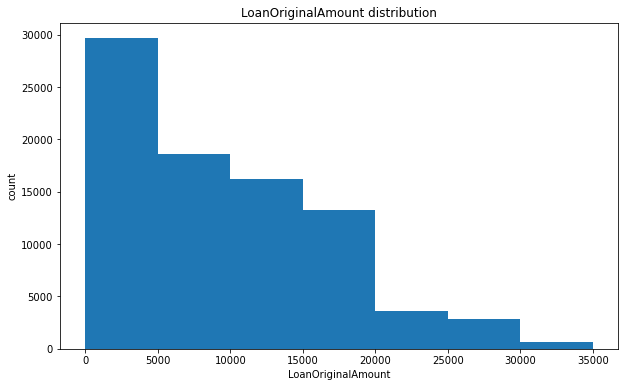

In [19]:
hist_plot("LoanOriginalAmount",5000,loan_data)

<blockquote> More People collected a Low amount of loan. The histogram distribution is skewed to the right

<h2> BorrowerRate DIstribution

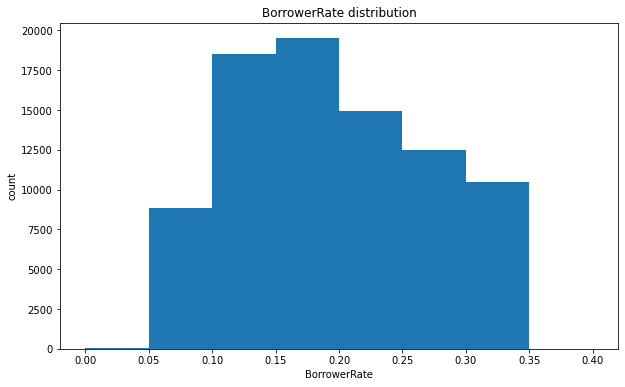

In [20]:
hist_plot("BorrowerRate",0.05,loan_data)

<blockquote> Borrow rate is skewed to the center. This happen to be a normal distribution 

<h2>BorrowerAPR Distribution

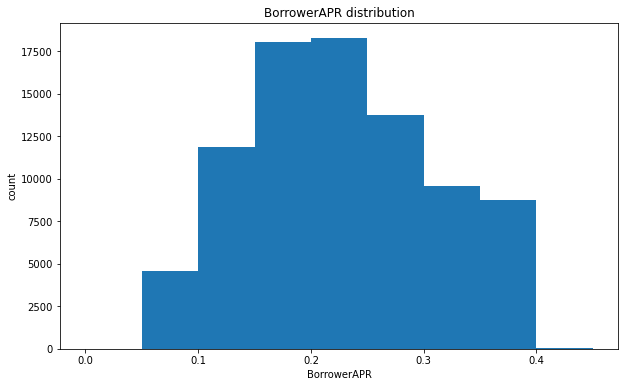

In [21]:
hist_plot("BorrowerAPR",0.05,loan_data)

<blockquote> The BorrowAPR rate has a central distribution which indicates a normal distribution 

<h2> ProsperRating Distribution

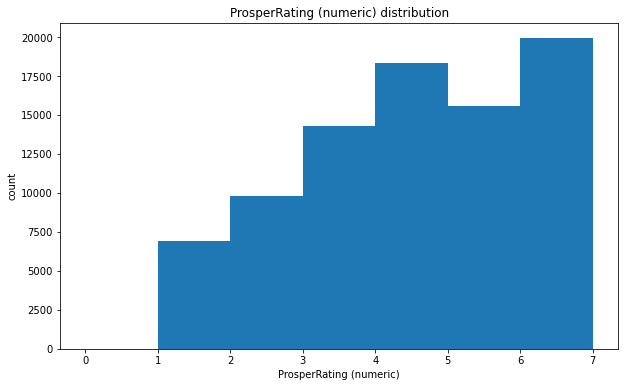

In [22]:
hist_plot("ProsperRating (numeric)",1,loan_data)

<blockquote> The Prosperrating distribution is skewed to the left with the highest count at the end.

<h2>Employment Status Duration Distribution

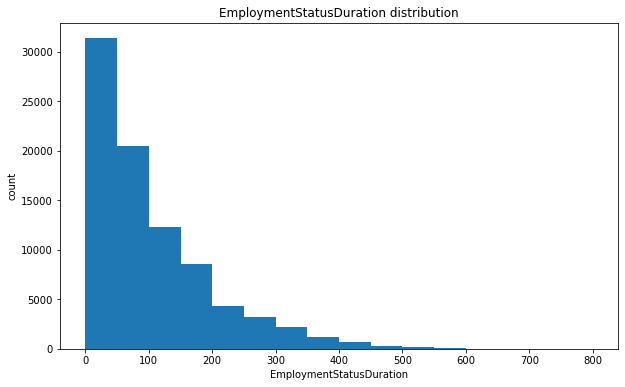

In [34]:
hist_plot("EmploymentStatusDuration",50,loan_data)

<blockquote> The lower employment status duration has the highest count of loan listing. The distribution is skewed to the right

<h2>IncomeRange Distribution With the Counts and Average LoanOriginalAmount

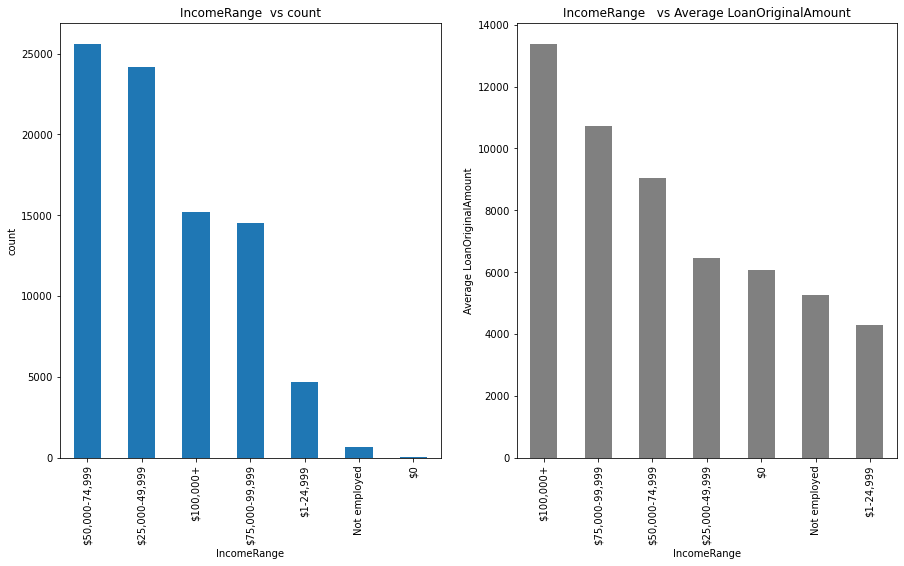

In [24]:
bar_plot("IncomeRange","bar")

<blockquote> Unemployed and inndividuals with low earnings are the least o the loan listing while high income earners constitute the largest amount of the loa listing.

<h2> ProsperRating Distribution on Count and Average LoanOrigialAmount

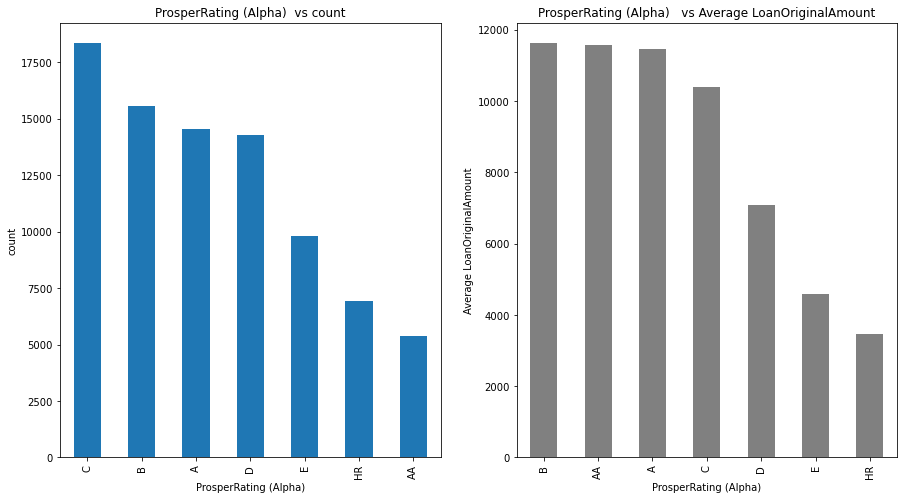

In [25]:
bar_plot("ProsperRating (Alpha)","bar")

<blockquote> Users with the ratig of C has the highest counnt on the loan listing while users with the rating of A and AA has the highest loan origial amount. 

<h2> EmploymentStatus Distribution on Count and Loan Original Amount

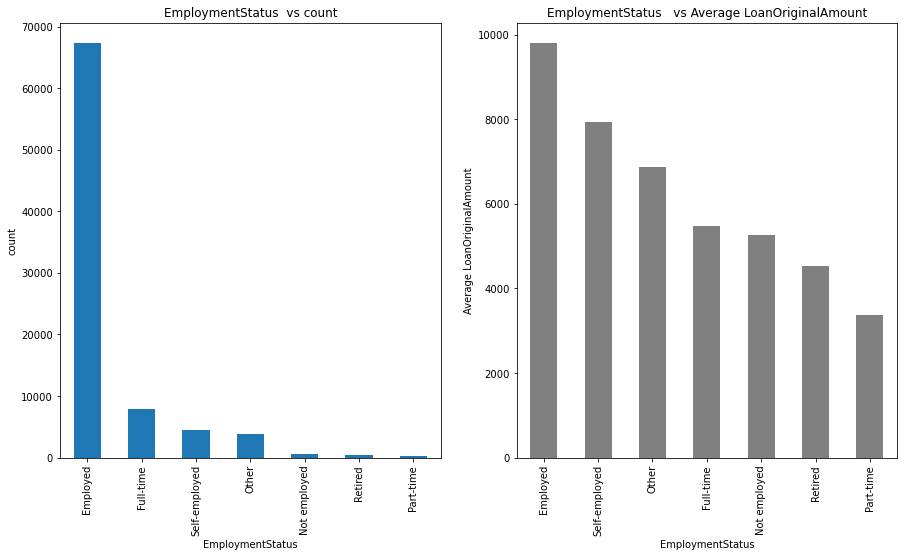

In [26]:
bar_plot("EmploymentStatus", "bar")

<blockquote> Employed people has the highest loan listing and the highest loan original amount on the loan listing.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We had the 3 three types of skeweness which are the left, right and cennter. There were no unusual point hece no transformation was performed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was no unusual distribution

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

<h2> debtToIncome On Loan Amount

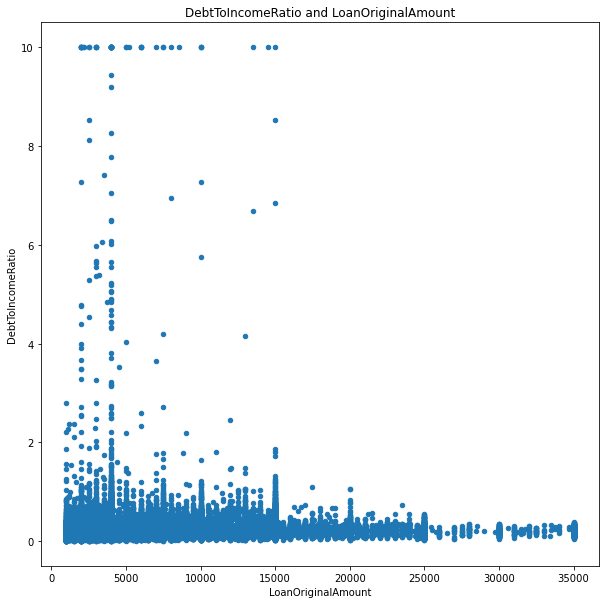

In [27]:
loan_data.plot(x='LoanOriginalAmount', y='DebtToIncomeRatio', kind='scatter',
                            title = 'DebtToIncomeRatio and LoanOriginalAmount', figsize = (10,10));

<blockquote> The distribution of individuals with high debt to income ratio has a effect on the original loan amount on the listing

<h2> Correlation Between Numeric values

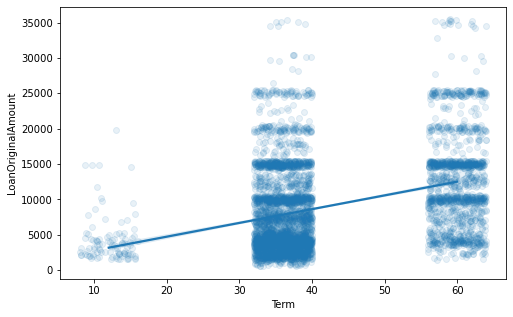

In [28]:
plt.figure(figsize=(8, 5))
colors = sb.color_palette('Paired')
sb.regplot(data=loan_data.sample(5000, random_state=1), x='Term', y='LoanOriginalAmount', 
            x_jitter=4, color= colors[1], y_jitter=500,scatter_kws={'alpha': 0.1});

<blockquote> Borrowers of higher amount have a longer term on their loan.

<h2> BorrowAPR against the Loan Original Amount

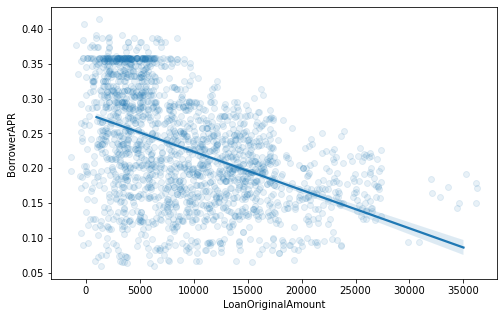

In [29]:
plt.figure(figsize=(8, 5))
sb.regplot(data=loan_data.sample(2000, random_state=1), x='LoanOriginalAmount', y='BorrowerAPR', 
            x_jitter=2500, color = colors[1], scatter_kws={'alpha': 0.1});

<blockquote> The plot above indicates that higher amount of loan has a lower Borrow APR compared to the lower amount

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

<h2> Relationship between BorrowerAPR, LoanOriginalAmout annd ProsperRating

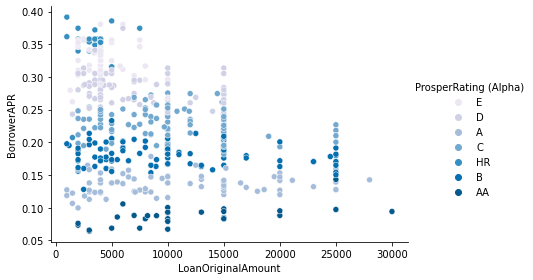

In [30]:
sb.relplot(data=loan_data.sample(500, random_state=1), y='BorrowerAPR', x='LoanOriginalAmount', 
            hue='ProsperRating (Alpha)', palette='PuBu', height=4, aspect=1.5);

<blockquote> Individuals with lower ratying gets the highest APR yet have access to the least amount

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is a good conection between Prosper rating and the amount a borrower has access to. Also, lower amount equates higher APR

### Were there any interesting or surprising interactions between features?

> No

## Conclusions
> This exploration was centered around the prosper loan data which we have used to gather statistics regarding differet loan ifluencing attribute.
<ul>
    <li> The lower employment status duration has the highest count of loan listing while the employed status is the employment status with the largest borrower.</li>
    <li> A borrower's rating is affect the amount of loan that can be accessed by the borrower. </li>
    <li> The percentage rate paid on the loan decreases as the loan amount increases. Also, the highest borrowers are on the part of the lower amount</li>


In [36]:
loan_data.to_csv('loan_data.csv')